###     Optimization_using_Scipy 
####    The following content will give you a brief introduction about the utility of scipy library in the field of optimization. 
####    This tutorial deals with both constraint and uncontraint optimization, some of its very basic codes and explainations for the beginners. 
#### To know more in details click <a href="https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html">here </a>. 
#### Rosenbrock function :- a multivariate scalar function, act as an objective function for both the types of problem. 
#### Some of its kinds are <a href=" https://en.wikipedia.org/wiki/Test_functions_for_optimization"> Benchmark functions to test optimizers </a>. 




In [1]:
# installing the scipy library 
!pip install scipy  

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


#### The above command will help you to install the scipy in python
#### Importing the  required libraries 

In [7]:
from scipy import optimize as so
import numpy as np
import math

#### Unconstarint optimization 
####  Objective function 

#### Minimize: $f(x,y) = (1-x) $<sup> 2 </sup> $+ 100*(y - x$<sup>2</sup>) <sup> 2</sup>
    
    
#### function is minimum at (1,1) with the value zero.
##### The first step to start with is to either declare the rosenback function or to simply call the inbuilt rosenback function from scipy library 


In [10]:
# Calling an inbuilt rosenbrock function 

rosen = so.rosen
print (rosen)

<function rosen at 0x0000025BEE5E6B70>


In [11]:
# declaring the rosenbrock

def rosen_user(x):
    return (1-x[0])**2+100*math.pow((x[1]- (x[0]**2)),2)

In [12]:
# minimzing the above functions with the help of different optimizers 
x=[0,2] # defining the range for the variable
res = so.minimize(rosen_user,x,method='powell')
print(res)

   direc: array([[-7.90312985e-03, -1.47693647e-02],
       [-9.73373762e-07, -2.01936048e-06]])
     fun: 4.61495955505936e-28
 message: 'Optimization terminated successfully.'
    nfev: 325
     nit: 12
  status: 0
 success: True
       x: array([1., 1.])


##### The above result  consist of multiple arguments which are explained below
#####  Objective value of the function is represent by "fun", Its value is almost equal to zero for this function. "nfev"  shows no of times objective function has evaluated.,  "nit" represents the no of the iteration taken by the optimizer., status represents status of termination. 


In [14]:

x=[0,2]
res = so.minimize(rosen,x,method='powell')
print(res)

   direc: array([[-7.90312985e-03, -1.47693647e-02],
       [-9.73373762e-07, -2.01936048e-06]])
     fun: 4.61495955505936e-28
 message: 'Optimization terminated successfully.'
    nfev: 325
     nit: 12
  status: 0
 success: True
       x: array([1., 1.])


##### The above optmizer is not using gradient information which increase the no of iteration and late convergence to the function. To improve the convergence rate we will incorporate the gradient information to the optimizer.  Gradient can be incorporated in two ways
##### 1. Calculating the gradient manually. 
##### 2. By default it will compute the value of the gradient. 

In [15]:
# Run with the default computation of the gradient 
res = so.minimize(rosen_user,x,method='BFGS')
print(res)

      fun: 2.1139082794782265e-11
 hess_inv: array([[0.48714168, 0.97239266],
       [0.97239266, 1.94573529]])
      jac: array([ 6.37411672e-06, -3.30079002e-06])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 23
     njev: 30
   status: 0
  success: True
        x: array([0.99999541, 0.99999079])


![derivative](img/derivative.png)
##### For detailed information <a href = https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html > Click_here </a>

In [21]:
# derivative of Rosenbrock function
def rosen_der(x):
    xm = x[1:-1] # pop the first and last element from the list and return the remaining list.
    xm_m1 = x[:-2] # pop the last element from the list and return the remaining list. 
    xm_p1 = x[2:] # create a list from the second element of the existing list.
    der = np.zeros_like(x) # create a zero array as the length of x. 
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der


In [22]:
# Running the optimizer with computed gradient: 
res = so.minimize(rosen_user,x,method='BFGS', jac =rosen_der)
print(res)

      fun: 3.3377753178068095e-14
 hess_inv: array([[0.486786  , 0.97169832],
       [0.97169832, 1.94439123]])
      jac: array([ 5.73889198e-06, -2.97548399e-06])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 23
     njev: 30
   status: 0
  success: True
        x: array([0.99999989, 0.99999977])


##### Like wise we can also call the other optimizer. 
###### Some of the optimizers do required calculation of hessian which can be computed manually as of jacobian. 

#### Now we will move to constrained optimization. First we will cover linear constarint and then we will cover non- linear constraint. Examples are given below. 

####  Objective function: 
$ min_{x,y}: f(x,y) = (1-x)$ <sup> 2 </sup> $+ 100*(y - x$<sup>2</sup>) <sup> 2</sup>

##### Subject to:

$x+y-2 =0 $ (Linear constraint)



##### The above linear constraint can be re written in the form of matrix which can be used with the inbuit function for linear constraint in scipy library



$ \begin{pmatrix}
   \infty
   \end{pmatrix} \leq
    \begin{pmatrix}
     1 & 1 
   \end{pmatrix}
   \begin{pmatrix}
     x \\
     y
   \end{pmatrix}
   \leq
     \begin{pmatrix}
     2
   \end{pmatrix} $  

In [23]:
linear_constraint = so.LinearConstraint([1,1],[-np.inf], [2]) # The first argument is the coefficent of all variables
# second and third arguments defines the upper and lower bounds for all the variables  

In [33]:
# Hessian matrix can be formed in tow ways 
# 1. calculate the partial second order derivative of the function 
# 2. used jacobian matrix as an approximation of hessian matrix

# it will create a diagonal matrix for the manually computed hessian 
def rosen_hess(x): 
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H


In [32]:

x=[0,2]
res = so.minimize(rosen_user,x, method='trust-constr', jac=rosen_der, hess=rosen_hess, constraints=linear_constraint)
print(res)

 barrier_parameter: 6.400000000000003e-06
 barrier_tolerance: 6.400000000000003e-06
          cg_niter: 71
      cg_stop_cond: 4
            constr: [array([1.99420849])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.06337285041809082
               fun: 3.727492214166025e-06
              grad: array([-0.00128806, -0.00128805])
               jac: [array([[1, 1]])]
   lagrangian_grad: array([-5.58057363e-09, -5.57077461e-10])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 45
              nhev: 40
             niter: 50
              njev: 40
        optimality: 5.580573626253957e-09
            status: 1
         tr_radius: 27454.98281013869
                 v: [array([0.00128805])]
                 x: array([0.9980704 , 0.99613809])


##### We will now use the above objective function with the non linear constraints
#### Subject to:
$(x-1)$<sup>3</sup>$ - y+1 =0$ (Non-Linear constraint)

In [34]:
# Defining the above constarint in thr form of function
def ineq_c(x):
    return (x[0]-1)**3 -x[1]+1

In [36]:

con = {'type': 'ineq', 'fun': ineq_c} # here type implies linear or non linear equation 
# as we have used non_linear equation hence the value of type will be ineq while for linear it will be eq
x0=[1,1]
res = so.minimize(rosen_user,x0,method='SLSQP',jac= rosen_der,constraints= con)
print (res)

     fun: 0.0
     jac: array([-0.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 1
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([1., 1.])


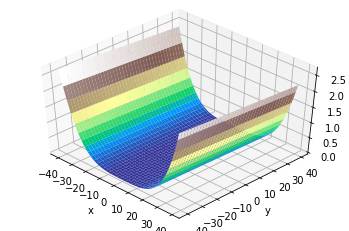

In [42]:
#  plotting our objective function 

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.arange(-40, 40)
y = np.arange(-40, 40)
xgrid, ygrid = np.meshgrid(x, y) #it is to create a rectangular grid out of the values for x and Y
xy = np.stack([xgrid, ygrid]) #will create a new array by joining the sequence of different arrays of same dimension
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, so.rosen(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


## Example 2


![derivative](img/problem.png)

In [1]:
import sys
import numpy as np
d = {1:80, 2:270, 3:250, 4:160, 5:180}  # customer demand
M = {1:500, 2:500, 3:500}               # factory capacity
I = [1,2,3,4,5]                         # Customers
J = [1,2,3]                             # Factories
cost = {(1,1):4,    (1,2):6,    (1,3):9,
     (2,1):5,    (2,2):4,    (2,3):7,
     (3,1):6,    (3,2):3,    (3,3):3,
     (4,1):8,    (4,2):5,    (4,3):3,
     (5,1):10,   (5,2):8,    (5,3):4
   }   

In [2]:
# to be used in SciPy we must transform cost dictionary into 2D aray
cost2d = np.empty([len(I), len(J)])
for i in range(len(I)):
    for j in range(len(J)):
        cost2d[i,j] = cost[i+1,j+1]

In [3]:
x0 = np.ones(len(cost))*100
bounds = list((0,max(d.values())) for _ in range(cost2d.size))

In [4]:
def objective(x):
    obj_func = sum(x[idx]*cost2d[idx//len(J), idx%len(J)] for idx in range(cost2d.size))
    return obj_func

In [5]:
# Constraints: sum of goods == customer demand
def const1():
    tmp = []
    for idx in range(0, cost2d.size, len(J)):
        tmp_constr = {
            'type': 'eq',
            'fun': lambda x, idx: d[idx//len(J) + 1] - np.sum(x[idx: idx + len(J)]),
            'args': (idx,)
            }
        tmp.append(tmp_constr)
    return tmp
# Constraints: sum of goods <= factory capacity
def const2():
    tmp = []
    for idx in range(0, cost2d.size, len(I)):
        tmp_constr = {
            'type': 'ineq',
            'fun': lambda x, idx=idx: M[idx//len(I) + 1] - np.sum(x[idx: idx + len(I)])
            }
        tmp.append(tmp_constr)
    return tmp
list_of_lists = [const1(), const2()]
constraints = [item for sublist in list_of_lists for item in sublist]

In [6]:
from scipy.optimize import minimize
solution = minimize(fun = objective,
                x0 = x0,
                bounds = bounds,
                method = 'SLSQP',
                constraints = constraints,
                tol = None,
                callback = None,
                options = {'full_output':False, 'disp':False, 'xtol': 1e-8}
                )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: OptimizeWarning: Unknown solver options: full_output, xtol
  if __name__ == '__main__':


In [7]:
if (solution.success) and (solution.status == 0):
    print("Solution is feasible and optimal")
    print("Objective function value = ", solution.fun)
elif solution.status != 0:
    print("Failed to find solution. Exit code", solution.status)
else:
    # something else is wrong
    print(solution.message)
if solution.success:
    EPS = 1.e-6
    for i,_ in enumerate(solution.x):
        if solution.x[i] > EPS:
            print("sending quantity %10s from factory %3s to customer %3s" % (round(solution.x[i]), i%len(J) + 1, i//len(I) + 1))

Solution is feasible and optimal
Objective function value =  3350.000000005696
sending quantity       80.0 from factory   1 to customer   1
sending quantity      270.0 from factory   2 to customer   1
sending quantity      125.0 from factory   2 to customer   2
sending quantity      125.0 from factory   3 to customer   2
sending quantity      160.0 from factory   3 to customer   3
sending quantity      180.0 from factory   3 to customer   3
